<a href="https://www.kaggle.com/code/search4/myntra-eda-archana-yadav?scriptVersionId=142108597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Name: Archana Yadav
### DataSet : Myntra Products Dataset
Dataset = (1060213, 11) with columns [id, name, img, asin, price, mrp, rating, ratingTotal, discount, seller, purl]
### Operations: Exploratory Data Analysis (Data Cleaning,Data Visualization)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/myntra-products-dataset/myntra202305041052.csv


#### Read dataset

In [2]:
df = pd.read_csv('/kaggle/input/myntra-products-dataset/myntra202305041052.csv')
df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


# EDA

In [3]:
df.shape

(1060213, 11)

In [4]:
df.describe()

,id,price,mrp,rating,ratingTotal,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04


In [5]:
myntra = df.copy()

#### Dropping unnecessary columns

In [6]:
myntra.drop(['img','asin','id'],axis=1,inplace=True)

#### Rename columns

In [7]:
myntra.rename(columns={'seller':'Brand','purl':'url'},inplace = True)

In [8]:
myntra.tail()

,name,price,mrp,rating,ratingTotal,discount,Brand,url
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine,https://www.myntra.com/jeans/flying-machine/fl...
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour,https://www.myntra.com/jeans/mast--harbour/mas...
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE,https://www.myntra.com/shorts/wrogn-active/wro...
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster,https://www.myntra.com/jeans/roadster/roadster...
1060212,Men Jeans,835.0,2199.0,0.0,0,62,IVOC,https://www.myntra.com/jeans/ivoc/ivoc-men-bla...


#### Check Dtypes

In [9]:
myntra.dtypes

name            object
price          float64
mrp            float64
rating         float64
ratingTotal      int64
discount         int64
Brand           object
url             object
dtype: object

#### Checking null vslues in the dataframe

In [10]:
myntra.isna().sum()

name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
Brand          0
url            0
dtype: int64

#### Check unique values

In [11]:
myntra.name.unique() 

array(['Men Solid Oversized Cotton', 'Men Cotton Pure Cotton T-shirt',
       'Women Pure Cotton T-shirt', ..., 'Slim Fit Twill Joggers',
       'Men VK AOP Chino Shorts',
       'Men Checked Slim Fit Cotton Track Pants'], dtype=object)

In [12]:
myntra.url.unique()

array(['https://www.myntra.com/tshirts/difference-of-opinion/difference-of-opinion-men-mint-green-round-neck-drop-shoulder-sleeves-cotton-loose-t-shirt/16407468/buy',
       'https://www.myntra.com/tshirts/roadster/roadster-men-black-cotton-pure-cotton-t-shirt/1996777/buy',
       'https://www.myntra.com/tshirts/dillinger/dillinger-women-navy-blue-typography-printed-pure-cotton-t-shirt/15598180/buy',
       ...,
       'https://www.myntra.com/jeans/mast--harbour/mast--harbour-men-blue-skinny-fit-low-distress-light-fade-acid-wash-jeans/18452958/buy',
       'https://www.myntra.com/jeans/roadster/roadster-men-grey-skinny-fit-mid-rise-clean-look-stretchable-jeans/8895025/buy',
       'https://www.myntra.com/jeans/ivoc/ivoc-men-black-jean-stretchable-jeans/17535248/buy'],
      dtype=object)

In [13]:
myntra.name[0]

'Men Solid Oversized Cotton'

In [14]:
myntra.url[0]

'https://www.myntra.com/tshirts/difference-of-opinion/difference-of-opinion-men-mint-green-round-neck-drop-shoulder-sleeves-cotton-loose-t-shirt/16407468/buy'

#### Create category column by using url information

In [15]:
# Add category of product
myntra['category']=myntra['url'].apply(lambda x : x.split('/')[-5])

In [16]:
myntra.category.unique()

array(['tshirts', 'shorts', 'shirts', 'tops', 'dresses', 'jeans',
       'co-ords', 'tights', 'leggings', 'jumpsuit', 'trousers',
       'track-pants', 'shrug', 'jewellery-set', 'sunglasses', 'ring',
       'hair-accessory', 'belts', 'bath-and-body-gift-set', 'earrings',
       'anklet', 'necklace-and-chains', 'bangle', 'handbags', 'bracelet',
       'mangalsutra', 'body-wash-and-scrub', 'kurtas', 'sarees',
       'lehenga-choli', 'kurta-sets', 'ethnic-dresses', 'kurtis',
       'smart-watches', 'watch-gift-set', 'watches', 'briefs',
       'lingerie-set', 'churidar', 'swimwear-cover-up-top', 'shapewear',
       'flip-flops', 'heels', 'flats', 'sports-shoes', 'casual-shoes',
       'bra', 'sweatshirts', 'socks', 'swimwear', 'nightdress',
       'lounge-pants', 'lingerie-accessories', 'night-suits',
       'baby-dolls', 'lounge-shorts', 'highlighter-and-blush',
       'eyeshadow', 'lipstick', 'eyebrow-enhancer', 'nail-essentials',
       'face-moisturisers', 'shampoo-and-conditioner',
 

#### Create description column by using url information

In [17]:
# Add description about product
myntra['description']=myntra['url'].apply(lambda x : x.split('/')[-3])

In [18]:
myntra

,name,price,mrp,rating,ratingTotal,discount,Brand,url,category,description
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts,difference-of-opinion-men-mint-green-round-nec...
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts,roadster-men-black-cotton-pure-cotton-t-shirt
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts,dillinger-women-navy-blue-typography-printed-p...
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts,huetrap-men-beige--black-typography-printed-su...
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts,roadster-men-green--white-printed-round-neck-p...
...,...,...,...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine,https://www.myntra.com/jeans/flying-machine/fl...,jeans,flying-machine-men-blue-slim-tapered-fit-heavy...
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour,https://www.myntra.com/jeans/mast--harbour/mas...,jeans,mast--harbour-men-blue-skinny-fit-low-distress...
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE,https://www.myntra.com/shorts/wrogn-active/wro...,shorts,wrogn-active-men-navy-blue--white-printed-shorts
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster,https://www.myntra.com/jeans/roadster/roadster...,jeans,roadster-men-grey-skinny-fit-mid-rise-clean-lo...


In [19]:
myntra.description.unique()

array(['difference-of-opinion-men-mint-green-round-neck-drop-shoulder-sleeves-cotton-loose-t-shirt',
       'roadster-men-black-cotton-pure-cotton-t-shirt',
       'dillinger-women-navy-blue-typography-printed-pure-cotton-t-shirt',
       ...,
       'the-indian-garage-co-men-charcoal-slim-fit-low-distress-light-fade-stretchable-jeans',
       'mash-unlimited-men-grey-melange-solid-slim-fit-cotton-track-pant',
       'mast--harbour-men-blue-skinny-fit-low-distress-light-fade-acid-wash-jeans'],
      dtype=object)

In [20]:
myntra.groupby('name').agg({'category':pd.Series.mode}).head()

,category
name,
Boys Top with Pyjamas,kurta-sets
Bralette Bra,bra
Eyeshadow Palette,eyeshadow
!28 TC Cotton Bedsheet,bedsheets
"""Selfie Wala Bhai"" Rakhi",rakhi


In [21]:
myntra[myntra['name']=='-']

,name,price,mrp,rating,ratingTotal,discount,Brand,url,category,description
127529,-,629.0,1399.0,0.0,0,55,JUMP USA,https://www.myntra.com/bra/jump-usa/jump-usa-m...,bra,jump-usa-maroon-bra
159257,-,987.0,1299.0,4.5,4,24,DChica,https://www.myntra.com/bra/dchica/girls-pack-o...,bra,girls-pack-of-5-single-layer-premium-cotton-no...
173765,-,2799.0,2799.0,0.0,0,0,ONLY,https://www.myntra.com/bra/only/only-blue--nav...,bra,only-blue--navy-blue-colourblocked-bra
175247,-,269.0,899.0,4.4,363,70,Kook N Keech Star Wars,https://www.myntra.com/caps/kook-n-keech-star-...,caps,kook-n-keech-star-wars-men-orange--black-cap
182836,-,479.0,1598.0,0.0,0,70,Leading Lady,https://www.myntra.com/bra/leading-lady/leadin...,bra,leading-lady-grey--navy-blue-floral-bra
...,...,...,...,...,...,...,...,...,...,...
815810,-,780.0,780.0,0.0,0,0,Sonari,https://www.myntra.com/bra/sonari/sonari-navy-...,bra,sonari-navy-blue-bra
815819,-,307.0,699.0,4.2,20,56,Rosaline by Zivame,https://www.myntra.com/bra/rosaline-by-zivame/...,bra,rosaline-by-zivame-blue--yellow-bra
815821,-,780.0,780.0,0.0,0,0,Sonari,https://www.myntra.com/bra/sonari/sonari-women...,bra,sonari-women-purple--lavender-non-padded-seaml...
816739,-,1160.0,1160.0,0.0,0,0,Sonari,https://www.myntra.com/bra/sonari/sonari-assor...,bra,sonari-assorted-floral-bra


In [22]:
myntra[myntra['name']=='-'].groupby('category').agg({'name':pd.Series.mode})

,name
category,
bra,-
caps,-
tshirts,-


#### Replace name = '-' by it's associate category

In [23]:
myntra.loc[myntra['name']=='-','name'] = myntra.loc[myntra['name']=='-','url'].apply(lambda x : x.split('/')[-5])

In [24]:
myntra.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'Brand',
       'url', 'category', 'description'],
      dtype='object')

In [25]:
myntra.discount.unique()

array([  59,   45,   54, ..., 1253, 4440, 6401])

In [26]:
myntra_df =myntra.copy()

#### Dropping url column as we not need it for further process

In [27]:
myntra_df.drop(['url'],axis=1,inplace=True)

In [28]:
myntra_df.head()

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,tshirts,difference-of-opinion-men-mint-green-round-nec...
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,tshirts,roadster-men-black-cotton-pure-cotton-t-shirt
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,tshirts,dillinger-women-navy-blue-typography-printed-p...
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,tshirts,huetrap-men-beige--black-typography-printed-su...
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,tshirts,roadster-men-green--white-printed-round-neck-p...


#### Check duplicated data

In [29]:
myntra_df.duplicated().sum()

318649

#### Droppping dulipate data

In [30]:
myntra_df.drop_duplicates(inplace=True)

In [31]:
myntra_df.duplicated().sum()

0

#### Operation on discount column

In [32]:
myntra_df.loc[myntra_df['discount'].apply(lambda x: len(str(x)))>2,['mrp','price','discount']].head()

,mrp,price,discount
53,2499.0,847.0,1652
58,1049.0,749.0,300
94,1199.0,625.0,574
106,1699.0,645.0,1054
111,1699.0,465.0,1234


In [33]:
myntra_df.loc[myntra_df['discount'].apply(lambda x: len(str(x)))<2,['mrp','price','discount']].head()

,mrp,price,discount
25,1699.0,1699.0,0
36,699.0,699.0,0
54,1999.0,1999.0,0
56,1649.0,1649.0,0
59,1449.0,1449.0,0


In [34]:
myntra_df.discount.unique()[0:200]

array([   59,    45,    54,    73,    86,    50,    60,    40,    42,
          75,    55,    58,     0,    30,    65,    10,    18,    35,
          70,    20,  1652,    62,    25,   300,     5,    67,    68,
          38,    36,   574,    69,  1054,    72,  1234,    80,    66,
          61,    85,    82,    84,   700,    88,    77,    90,    48,
          56,    28,    41,    76,    63,  2301,    78,  4700,  2900,
        1700,  8500,    64,    52,  2000,   100,    53,    33,    22,
        1220,    16,    15,    49,  1400,    46,   501,    13,    81,
          79,     6,    74,    83,    51,    57,    71,    47,  2404,
         751,    32,     2,    37,     4,     8,     3,    19,   800,
          34,    26,     7,    27,  1991,  1191,  6391,  8300,  3200,
        7400,  8000,  1500,  4000,  1791,  1691,  2300,  2500,  1091,
        8700,  7000,  4300,  6246,  4981,  1401,   903,   500,    87,
        1305,   820,   251,   850,   160,   204,   550,   899,  1000,
        1549,   624,

#### Convert values into discount percentage if discount value > 90

In [35]:
def discount_percent(x):
    return (100*x[1]//x[0])

myntra_df.loc[myntra_df['discount']>90,'discount']=myntra_df.loc[
        myntra_df['discount']>90,['mrp','discount']].apply(discount_percent,axis=1)

In [36]:
myntra_df.discount.unique()

array([59, 45, 54, 73, 86, 50, 60, 40, 42, 75, 55, 58,  0, 30, 65, 10, 18,
       35, 70, 20, 66, 62, 25, 28,  5, 67, 68, 38, 36, 47, 69, 72, 80, 61,
       85, 82, 84, 88, 77, 90, 48, 56, 41, 76, 63, 57, 78, 64, 52, 53, 33,
       22, 71, 16, 15, 49, 46, 13, 81, 79,  6, 74, 83, 51, 32,  2, 37,  4,
        8,  3, 19, 44, 34, 26,  7, 27,  9, 43, 87, 29, 21, 14, 23, 17, 24,
       89, 12, 11, 31, 39,  1])

#### Checking duplicates

In [37]:
myntra_df.duplicated().sum()

50

#### Dropping duplicates

In [38]:
myntra_df.drop_duplicates(inplace=True)

#### Observing all data if rating=0 

In [39]:
myntra_df[myntra_df['rating']==0]

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
50,Women Mid Rise Shorts,532.0,1299.0,0.0,0,59,BRINNS,shorts,brinns-women-mid-rise-shorts
51,Puffed Sleeves Casual Shirt,899.0,1499.0,0.0,0,40,Wool Trees,shirts,wool-trees-spread-collar-puffed-sleeves-casual...
52,Typography Printed T-shirt,559.0,699.0,0.0,0,20,Okane,tshirts,okane-typography-printed-extended-sleeves-t-shirt
53,Embroidered Georgette Top,847.0,2499.0,0.0,0,66,WEAVETECH IMPEX,tops,weavetech-impex-black-embroidered-georgette-lo...
54,Lace Inserted Pure Cotton Top,1999.0,1999.0,0.0,0,0,Sztori,tops,sztori-frilled-mandarin-collar-lace-inserted-p...
...,...,...,...,...,...,...,...,...,...
1060199,Men Slim Fit Trousers,1709.0,1899.0,0.0,0,10,J Hampstead,trousers,j-hampstead-men-black-smart-slim-fit-wrinkle-f...
1060202,Men Solid Cotton Track Pants,799.0,1999.0,0.0,0,60,beevee,track-pants,beevee-men-green-solid-cotton-track-pants
1060203,Men Colourblocked Joggers,424.0,849.0,0.0,0,50,Styli,track-pants,styli-men-colourblocked-slim-fit-joggers
1060204,Men Checked Slim Fit Cotton Track Pants,847.0,1695.0,0.0,0,50,Duke,track-pants,duke-men-blue-checked-slim-fit-cotton-track-pants


In [40]:
myntra_df[(myntra_df['Brand']=='BRINNS') & (myntra_df['category']=='shorts')]

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
50,Women Mid Rise Shorts,532.0,1299.0,0.0,0,59,BRINNS,shorts,brinns-women-mid-rise-shorts
77,Women Mid Rise Shorts,531.0,1399.0,0.0,0,62,BRINNS,shorts,brinns-women-mid-rise-knitted-shorts
3550,Women Shorts,532.0,1299.0,0.0,0,59,BRINNS,shorts,brinns-women-mid-rise-shorts
3575,Women Mid Rise Cotton Shorts,545.0,1399.0,0.0,0,61,BRINNS,shorts,brinns-women-mid-rise-pure-cotton-shorts
3908,Women Sports Shorts,531.0,1399.0,0.0,0,62,BRINNS,shorts,brinns-women-mid-rise-sports-shorts
5340,Women Pure Cotton Shorts,545.0,1399.0,0.0,0,61,BRINNS,shorts,brinns-women-mid-rise-pure-cotton-shorts
10581,Women Shorts,531.0,1399.0,0.0,0,62,BRINNS,shorts,brinns-women-mid-rise-shorts
47316,Women Printed Shorts,532.0,1299.0,0.0,0,59,BRINNS,shorts,brinns-women-mid-rise-geometric-printed-shorts
507399,Women Shorts,528.0,1600.0,0.0,0,67,BRINNS,shorts,brinns-women-peach-coloured-shorts
616021,Women Shorts,528.0,1600.0,0.0,0,67,BRINNS,shorts,brinns-women-teal-green-cotton-shorts


In [41]:
myntra_df[(myntra_df['Brand']=='Wool Trees') & (myntra_df['category']=='shirts')]

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
51,Puffed Sleeves Casual Shirt,899.0,1499.0,0.0,0,40,Wool Trees,shirts,wool-trees-spread-collar-puffed-sleeves-casual...
17595,Opaque Formal Shirt,839.0,1399.0,0.0,0,40,Wool Trees,shirts,wool-trees-lapel-collar-short-sleeves-casual-s...
22727,Mandarin Collar Casual Shirt,899.0,1499.0,0.0,0,40,Wool Trees,shirts,wool-trees-mandarin-collar-long-sleeves-casual...
26056,Spread Collar Casual Shirt,959.0,1599.0,0.0,0,40,Wool Trees,shirts,wool-trees-spread-collar-three-quarter-sleeves...


In [42]:
myntra_df[(myntra_df['Brand']=='LYRA') & (myntra_df['category']=='leggings')].head(10)

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
72,Women Mid Rise Cotton Leggings,494.0,549.0,0.0,0,10,LYRA,leggings,lyra-women-original-mid-rise-cotton-leggings
3755,Women Ankle-Length Leggings,440.0,489.0,4.4,22,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
5516,Women Ankle-Length Leggings,440.0,489.0,0.0,0,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
5534,Women Ankle-Length Leggings,440.0,489.0,4.6,22,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
5545,Women Ankle-Length Leggings,440.0,489.0,3.8,5,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
10756,Women Ankle-Length Leggings,440.0,489.0,4.3,102,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
10796,Women Ankle-Length Leggings,440.0,489.0,4.6,13,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
12532,Women Ankle-Length Leggings,440.0,489.0,4.1,7,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
15804,Women Ankle Length Leggings,494.0,549.0,0.0,0,10,LYRA,leggings,lyra-women-ankle-length-leggings
16002,Women Ankle-Length Leggings,440.0,489.0,4.6,15,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings


In [43]:
zero_rating = myntra_df.loc[myntra_df['rating']==0,'Brand'].value_counts()
zero_rating

JC Collection                         4622
CANDERE A KALYAN JEWELLERS COMPANY    4060
DailyObjects                          3990
Gini and Jony                         3657
Devansh                               3598
                                      ... 
WELCOME                                  1
Woakers                                  1
LAWell                                   1
RENTIYO                                  1
Vighnaharta                              1
Name: Brand, Length: 5288, dtype: int64

#### Brand having ratings =0

<Axes: >

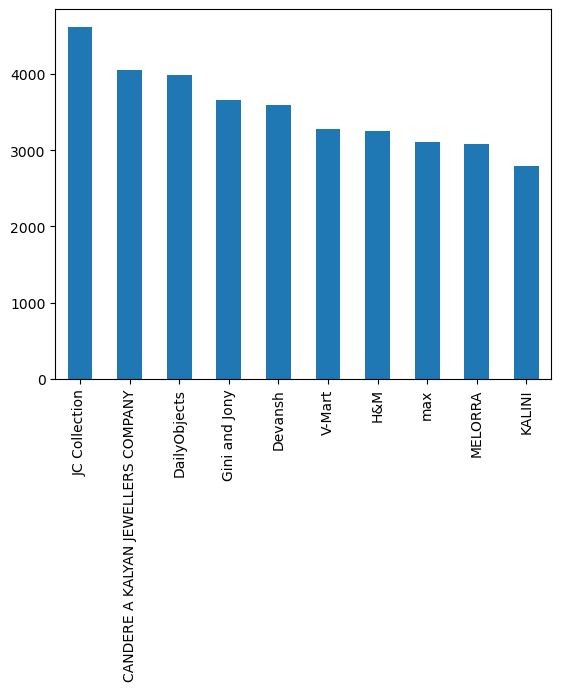

In [44]:
zero_rating[:10].plot(kind = 'bar')

In [45]:
myntra_df[myntra_df['description']=='lyra-women-original-mid-rise-cotton-leggings']

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
72,Women Mid Rise Cotton Leggings,494.0,549.0,0.0,0,10,LYRA,leggings,lyra-women-original-mid-rise-cotton-leggings
53509,Women Mid Rise Cotton Leggings,494.0,549.0,0.0,0,10,LYRA,trousers,lyra-women-original-mid-rise-cotton-leggings


In [46]:
myntra_df[myntra_df['description']=='okane-typography-printed-extended-sleeves-t-shirt']

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
52,Typography Printed T-shirt,559.0,699.0,0.0,0,20,Okane,tshirts,okane-typography-printed-extended-sleeves-t-shirt
14068,Typography Printed T-shirt,496.0,620.0,0.0,0,20,Okane,tshirts,okane-typography-printed-extended-sleeves-t-shirt
44139,Extended Sleeves T-shirt,496.0,620.0,0.0,0,20,Okane,tshirts,okane-typography-printed-extended-sleeves-t-shirt


In [47]:
myntra_df[myntra_df['description']=='lyra-women-4-way-stretch-ankle-length-leggings']

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
3755,Women Ankle-Length Leggings,440.0,489.0,4.4,22,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
5516,Women Ankle-Length Leggings,440.0,489.0,0.0,0,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
5534,Women Ankle-Length Leggings,440.0,489.0,4.6,22,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
5545,Women Ankle-Length Leggings,440.0,489.0,3.8,5,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
10756,Women Ankle-Length Leggings,440.0,489.0,4.3,102,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
10796,Women Ankle-Length Leggings,440.0,489.0,4.6,13,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
12532,Women Ankle-Length Leggings,440.0,489.0,4.1,7,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings
16002,Women Ankle-Length Leggings,440.0,489.0,4.6,15,10,LYRA,leggings,lyra-women-4-way-stretch-ankle-length-leggings


In [48]:
df2 = myntra_df.groupby('description')['rating'].agg('mean')
d=df2.to_dict()
#d

In [49]:
# df1 = myntra_df[myntra_df['Brand'].isin(zero_rating.index)]
def ratings(x):
    return d[x]

myntra_df.loc[(myntra_df['rating']==0),'rating']=myntra_df.loc[(myntra_df['rating']==0),'description'].map(ratings)

In [50]:
myntra_df[myntra_df['rating']==0]

,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
50,Women Mid Rise Shorts,532.0,1299.0,0.0,0,59,BRINNS,shorts,brinns-women-mid-rise-shorts
51,Puffed Sleeves Casual Shirt,899.0,1499.0,0.0,0,40,Wool Trees,shirts,wool-trees-spread-collar-puffed-sleeves-casual...
52,Typography Printed T-shirt,559.0,699.0,0.0,0,20,Okane,tshirts,okane-typography-printed-extended-sleeves-t-shirt
53,Embroidered Georgette Top,847.0,2499.0,0.0,0,66,WEAVETECH IMPEX,tops,weavetech-impex-black-embroidered-georgette-lo...
54,Lace Inserted Pure Cotton Top,1999.0,1999.0,0.0,0,0,Sztori,tops,sztori-frilled-mandarin-collar-lace-inserted-p...
...,...,...,...,...,...,...,...,...,...
1060199,Men Slim Fit Trousers,1709.0,1899.0,0.0,0,10,J Hampstead,trousers,j-hampstead-men-black-smart-slim-fit-wrinkle-f...
1060202,Men Solid Cotton Track Pants,799.0,1999.0,0.0,0,60,beevee,track-pants,beevee-men-green-solid-cotton-track-pants
1060203,Men Colourblocked Joggers,424.0,849.0,0.0,0,50,Styli,track-pants,styli-men-colourblocked-slim-fit-joggers
1060204,Men Checked Slim Fit Cotton Track Pants,847.0,1695.0,0.0,0,50,Duke,track-pants,duke-men-blue-checked-slim-fit-cotton-track-pants


In [51]:
myntra_df.shape , myntra_df.dtypes

((741514, 9),
 name            object
 price          float64
 mrp            float64
 rating         float64
 ratingTotal      int64
 discount         int64
 Brand           object
 category        object
 description     object
 dtype: object)

# Data Visualization

### Correlation (Heapmap for numerical columns)

<Axes: >

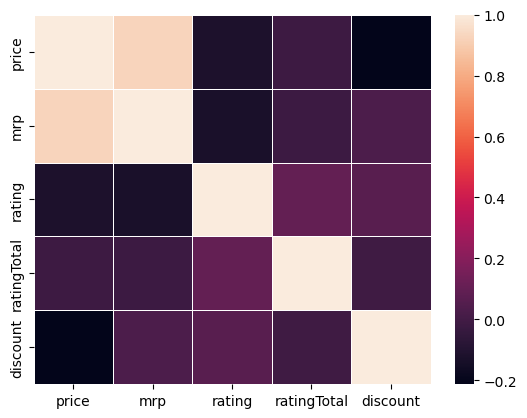

In [52]:
sns.heatmap(myntra_df.corr(numeric_only=True),linewidths=0.5, linecolor="white")

##### mrp and price are hightly corelated to each other

#### Distribution (Histrogram with kde for mrp,price,discount, rating)

<Axes: xlabel='mrp', ylabel='Count'>

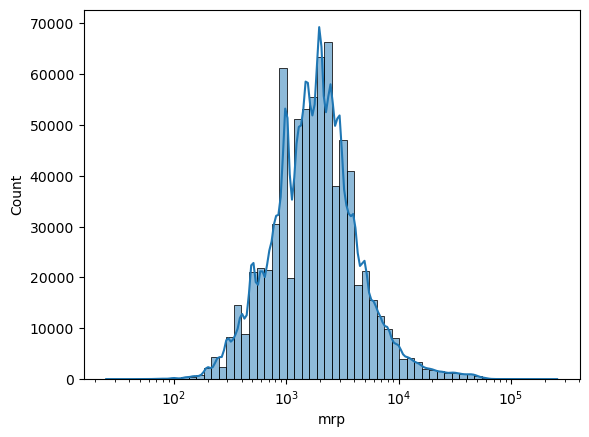

In [53]:
sns.histplot(kde=True,data=myntra_df,x='mrp',bins=60,log_scale=True)

##### Most of the mrp rate are approx in range of Rs.900 to Rs. 3000

<Axes: xlabel='price', ylabel='Count'>

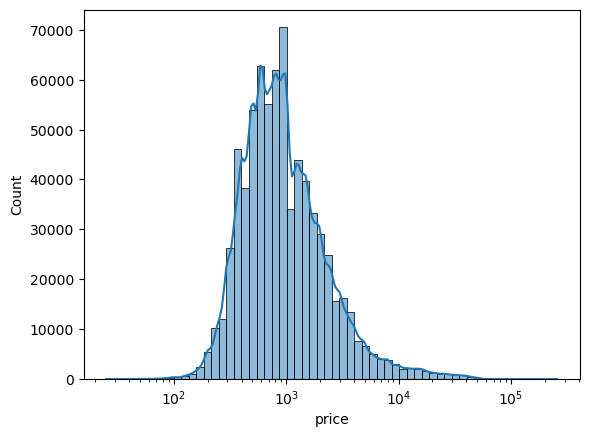

In [54]:
sns.histplot(kde=True,data=myntra_df,x='price',bins=60, log_scale=True)

##### most of the product selling price are approx from Rs. 600 to Rs. 1000

<Axes: xlabel='discount', ylabel='Count'>

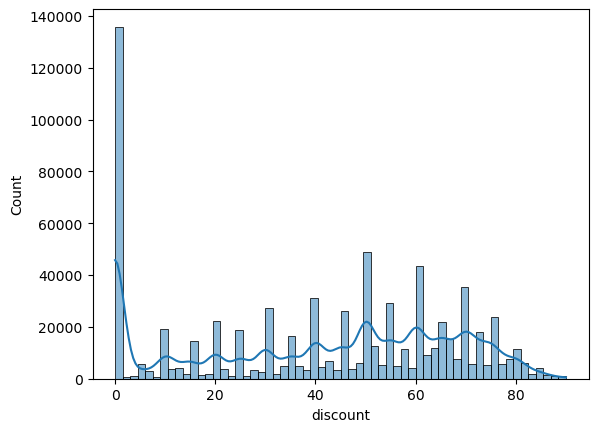

In [55]:
sns.histplot(kde=True,data=myntra_df,x='discount',bins=60)

##### if you're looking overall discount most of the products having no discount or having approx 50-60% discount

<Axes: xlabel='rating', ylabel='Count'>

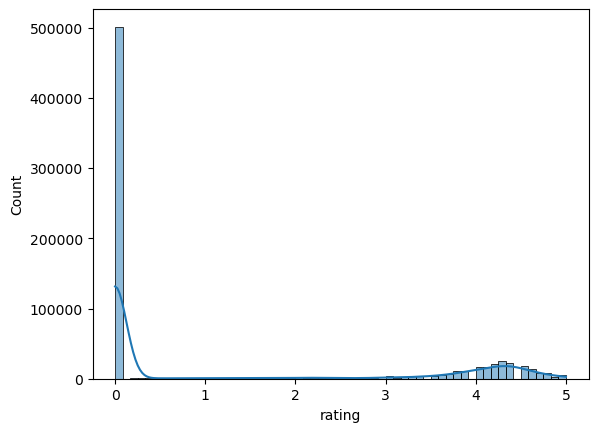

In [56]:
sns.histplot(kde=True,data=myntra_df,x='rating',bins=60)

#### Due to some reason most of the products having zero ratings, may be like they launch new product or no one buy until 04th May 2023 or people don't like their product quality/services

### barplot for category column by value_counts

In [57]:
s = myntra.category.value_counts().reset_index()
h= s.head(10)
t = s.tail(10)

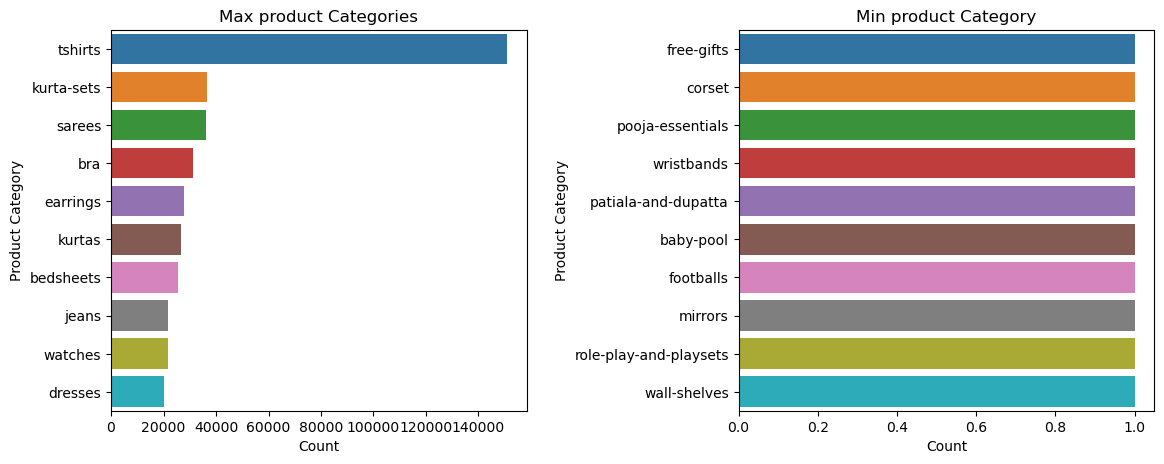

In [58]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))   
fig.subplots_adjust(bottom=0.2, left=0.2)

s = sns.barplot(data=h,y='index',x='category',ax=axes[0])
s.set_xlabel('Count')
s.set_ylabel('Product Category')
s.set_title('Max product Categories')

s1 = sns.barplot(data=t,y='index',x='category',ax=axes[1])
s1.set_xlabel('Count')
s1.set_ylabel('Product Category')
s1.set_title('Min product Category')


plt.tight_layout(pad=2)

##### by count you can see most of the products are fall in tshirt category

#### Checking Outliers in mrp and price

<Axes: >

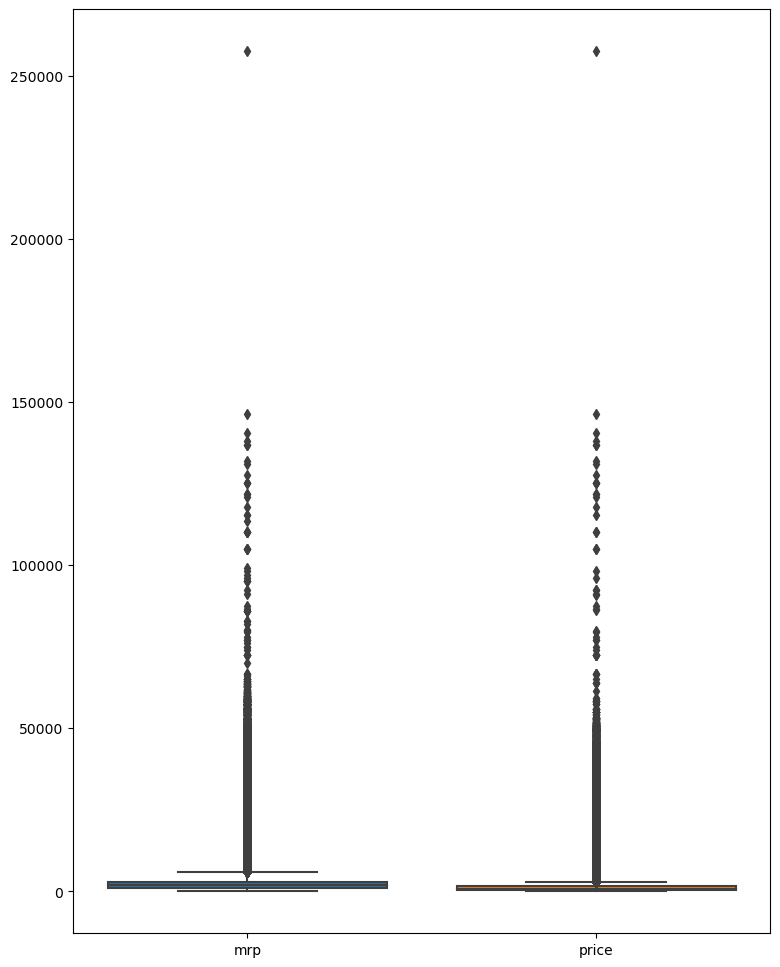

In [59]:
plt.figure(figsize=(9,12))
sns.boxplot(myntra_df[["mrp","price"]])

##### Few of the products having more cost as compare to other products

#### Top Brands by it's frequence 

In [60]:
m = myntra['Brand'].value_counts().head(20).reset_index()

Text(0, 0.5, 'Brand')

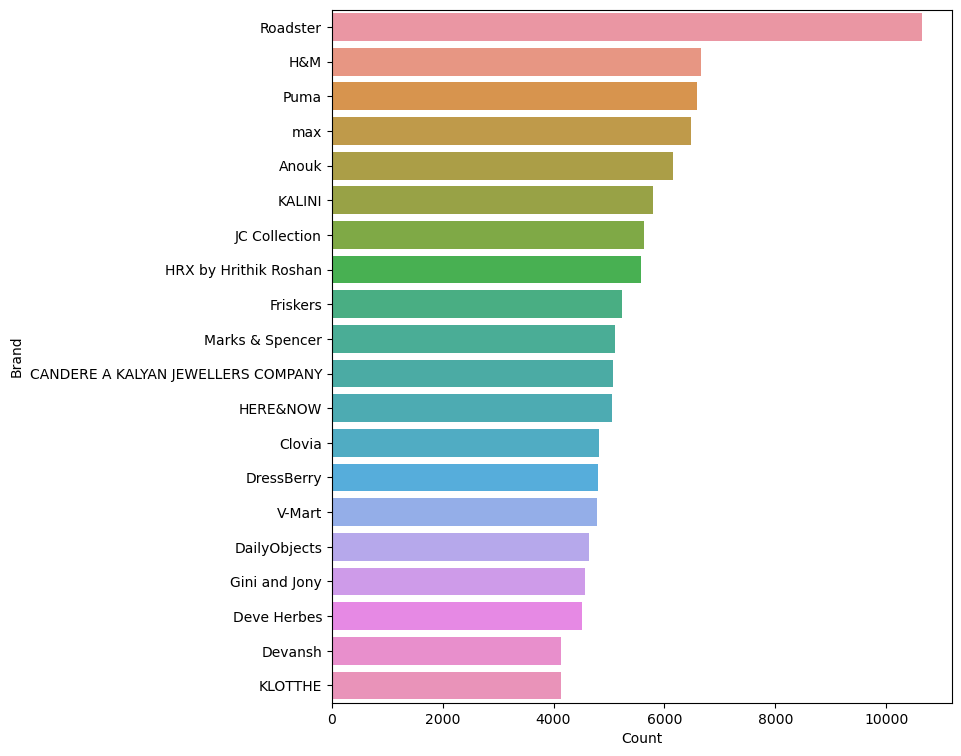

In [61]:
plt.figure(figsize=(8,9))
s = sns.barplot(data=m,y='index',x='Brand')
s.set_xlabel('Count')
s.set_ylabel('Brand')

##### most of the product are from Roadster brand

In [62]:
group_discount = myntra_df.groupby('category').agg({'discount':'mean'}).sort_values(by= 'discount',ascending = False).head(10)

In [63]:
Pro_brand = myntra_df.groupby('category').agg({'Brand':pd.Series.mode})
# Pro_brand[0:60]

#### Top discount product 

<Axes: xlabel='discount', ylabel='category'>

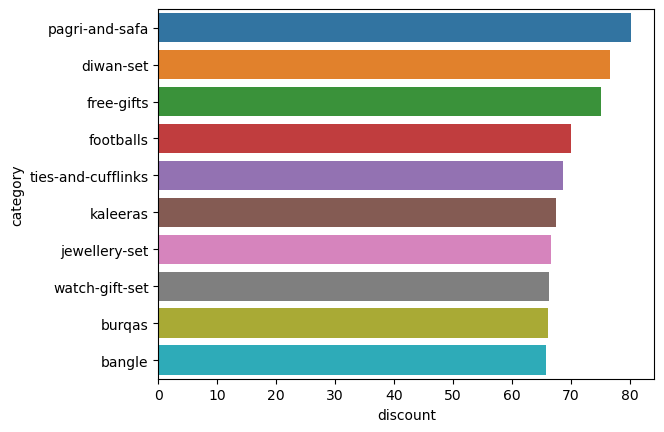

In [64]:
sns.barplot(data=group_discount,x='discount',y=group_discount.index)

##### from the above plot we can say that maximum discount is on pagri and safa

#### Brand, Category v/s Ratings

In [65]:
a = myntra.groupby(['Brand','category']).agg({'rating':'mean'}).reset_index()
c = a[a['rating']>2].tail(15)
# c

In [66]:
b = myntra.groupby(['Brand','category']).agg({'rating':'mean'}).sort_values(by = 'rating', ascending = False).reset_index().head(15)

<Axes: xlabel='rating', ylabel='Brand'>

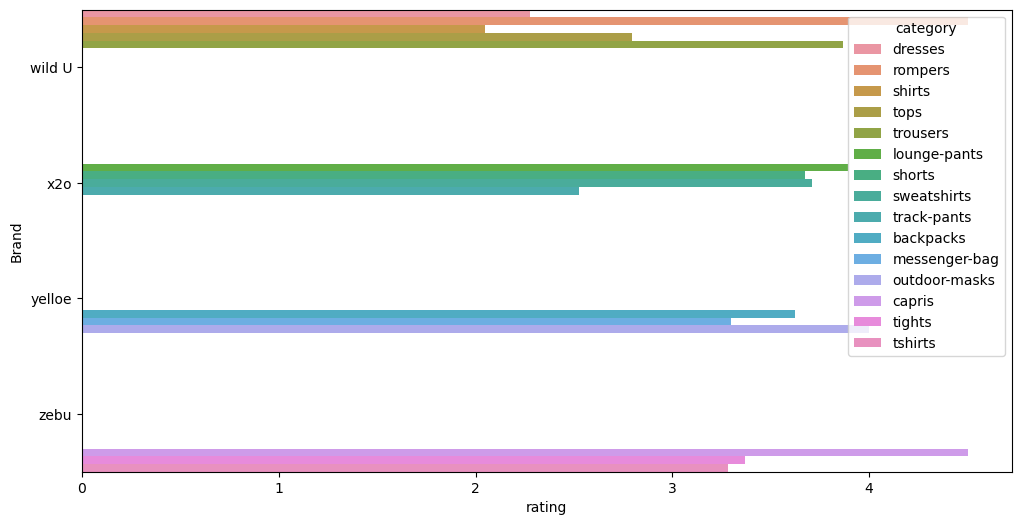

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=c, y = 'Brand', x='rating',hue='category',width=1)

##### Different brands with their top rating products

<Axes: xlabel='rating', ylabel='Brand'>

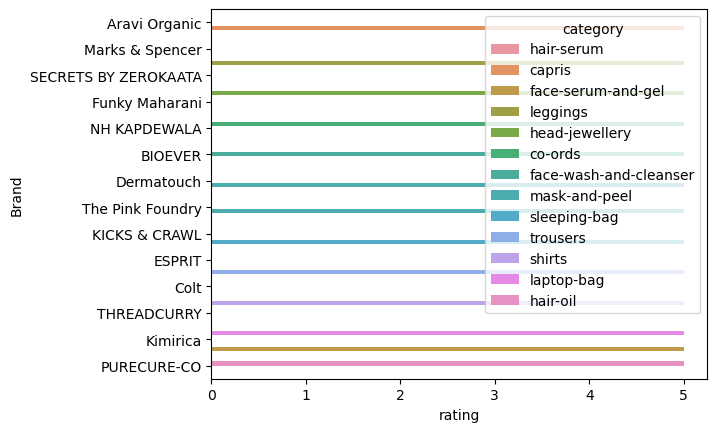

In [68]:
sns.barplot(data=b, y = 'Brand', x='rating',hue='category',width=2)

##### As you can observe the above plot, these are the Brands having 5/5 ratings on some of their product  

#### Brand v/s ratingTotal

Text(0.5, 0, 'ratingTotal')

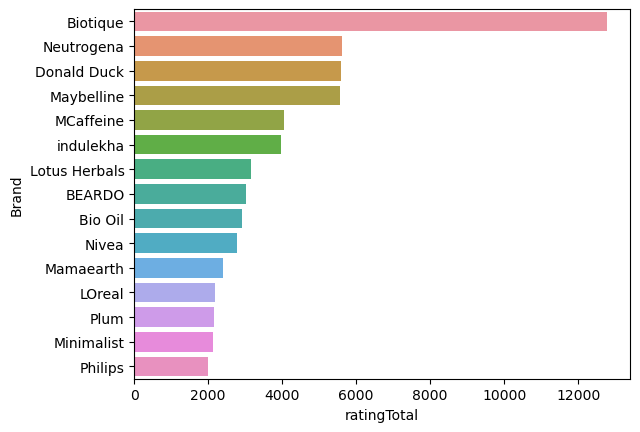

In [69]:
b_rating = myntra_df.groupby('Brand').agg({'ratingTotal':'mean'}).sort_values(by='ratingTotal',ascending=False).head(15)
s= sns.barplot(data=b_rating , x='ratingTotal',y=b_rating.index)
s.set_xlabel('ratingTotal')

##### Biotique having max verified customer reviews/ratings

#### Category v/s ratingTotal

Text(0.5, 0, 'ratingTotal')

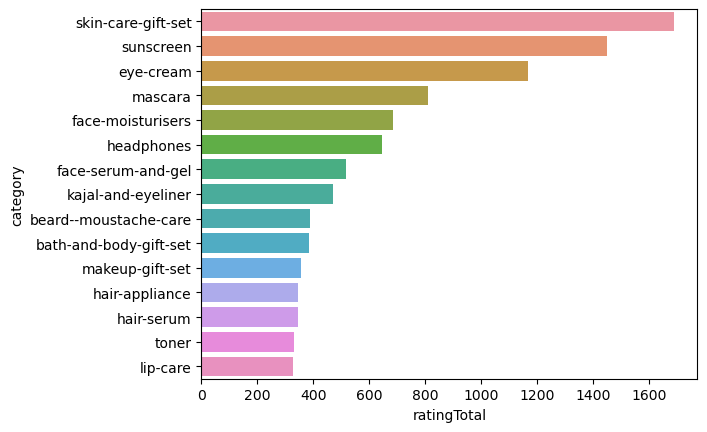

In [70]:
p_rating = myntra_df.groupby('category').agg({'ratingTotal':'mean'}).sort_values(by='ratingTotal',ascending=False).head(15)
s= sns.barplot(data=p_rating , x='ratingTotal',y=p_rating.index)
s.set_xlabel('ratingTotal')

##### In product category skin_care_gift_set having maximum verified customer reviews/ratings

#### Brand v/s Discount values

<Axes: xlabel='discount', ylabel='Brand'>

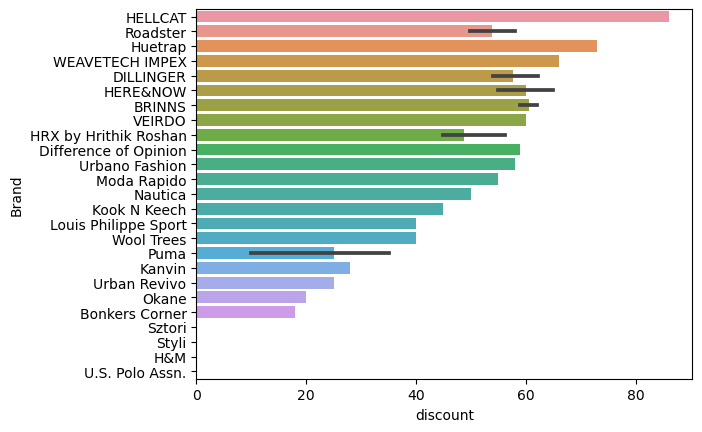

In [71]:
sns.barplot(data=myntra_df[0:60].sort_values(by='discount',ascending=False) , x='discount',y='Brand')

##### HELLCAT is clothing brand gives max discount on their product

#### Brand v/s price and rating

In [72]:
brand_sale = myntra_df.groupby('Brand').agg({'price':'mean','rating':'mean'}).sort_values(by=['rating','price'], ascending= False).head(15)
# brand_sale

<Axes: xlabel='price', ylabel='Brand'>

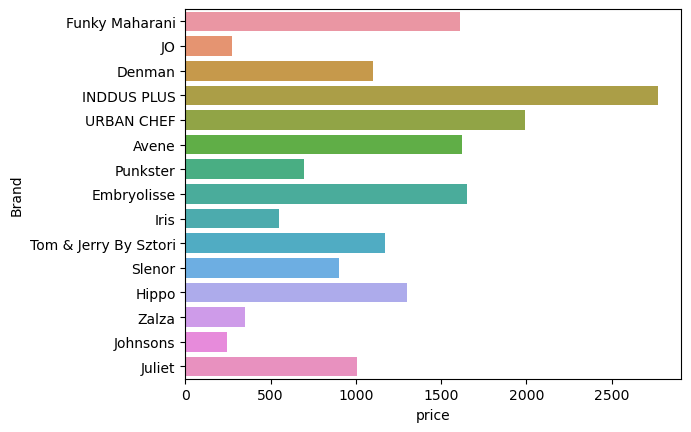

In [73]:
sns.barplot(data=brand_sale,y=brand_sale.index,x='price')

##### Costwise INDDUS PLUS is on the top but ratingwise Funky Maharani is on top

## Product Search

In [75]:
def product_recom(product_category,brand_name,budget):
    
    display(myntra_df[(myntra_df['category']== product_category) & 
                  (myntra_df['Brand']==brand_name) & (myntra_df['price']<=budget)].sort_values(by='rating', ascending=False),'Thank You..!')
 


product_category= input('Enter product category')
brand_name = input('Enter the brand name')
budget = float(input('Enter your budget'))

product_recom(product_category,brand_name,budget)

Enter product category shorts
Enter the brand name BRINNS
Enter your budget 700


,name,price,mrp,rating,ratingTotal,discount,Brand,category,description
789030,Women Regular Shorts,528.0,1600.0,4.1,8,67,BRINNS,shorts,brinns-women-black-solid-mid-rise-regular-shorts
636410,Women Solid Shorts,528.0,1600.0,3.3,3,67,BRINNS,shorts,brinns-women-magenta-solid-shorts
635229,Women Cotton Shorts,543.0,1699.0,0.0,0,68,BRINNS,shorts,brinns-women-white-solid-cotton-shorts
785582,Women Regular Shorts,543.0,1699.0,0.0,0,68,BRINNS,shorts,brinns-women-dark-grey-solid-mid-rise-regular-...
784589,Women Regular Shorts,528.0,1600.0,0.0,0,67,BRINNS,shorts,brinns-women-olive-green-solid-regular-shorts
784579,Women Regular Shorts,543.0,1699.0,0.0,0,68,BRINNS,shorts,brinns-women-peach-coloured-solid-regular-shorts
741586,Women Shorts,569.0,1499.0,0.0,0,62,BRINNS,shorts,brinns-women-navy-blue-printed-shorts
663237,Women Shorts,594.0,1800.0,0.0,0,67,BRINNS,shorts,brinns-women-navy-blue-shorts
658705,Women Shorts,594.0,1800.0,0.0,0,67,BRINNS,shorts,brinns-women-black-shorts
50,Women Mid Rise Shorts,532.0,1299.0,0.0,0,59,BRINNS,shorts,brinns-women-mid-rise-shorts


'Thank You..!'